In [1]:
import GridMLM_tokenizers
from GridMLM_tokenizers import CSGridMLMTokenizer
from data_utils import CSGridMLMDataset
import plot_utils as pu
import embedding_utils as eu
from sklearn.manifold import TSNE
import numpy as np
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

/home/maximos/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
val_dir = '/mnt/ssd2/maximos/data/hooktheory_midi_hr/CA_test'
parent_dir_idioms = '/mnt/ssd2/maximos/data/coinvent_midi'
other_dirs = os.listdir(parent_dir_idioms)
idiom_dirs = [f for f in other_dirs if '.pickle' not in f]

In [3]:
# full_dirs = []
full_dirs = [val_dir]
for d in tqdm(idiom_dirs):
    full_dirs.append(os.path.join(parent_dir_idioms, d))

100%|██████████| 32/32 [00:00<00:00, 524288.00it/s]


In [4]:
tokenizer = CSGridMLMTokenizer(
    fixed_length=80,
    quantization='4th',
    intertwine_bar_info=True,
    trim_start=False,
    use_pc_roll=True,
    use_full_range_melody=False
)

val_dataset = CSGridMLMDataset(val_dir, tokenizer, frontloading=True, name_suffix='Q4_L80_bar_PC')

Loading data file.


In [5]:
idiom_ids = []
lstm_embeds = []
matrix_embeds = []
bot_embeds = []
graph_embeds = []

for i, idiom in enumerate(full_dirs):
    print(idiom)
    val_dataset = CSGridMLMDataset(idiom, tokenizer, frontloading=True, name_suffix='Q4_L80_bar_PC')
    lstm_np = eu.get_lstm_embeddings_for_dataset(val_dataset, tokenizer)
    lstm_embeds.append(lstm_np)
    matrix_np = eu.get_matrix_embeddings_for_dataset(val_dataset, tokenizer)
    matrix_embeds.append(matrix_np)
    bot_np = eu.get_bot_embeddings_for_dataset(val_dataset, tokenizer)
    bot_embeds.append(bot_np)
    graph_np = eu.get_graph_embeddings_for_dataset(val_dataset, tokenizer)
    graph_embeds.append(graph_np)
    idiom_ids.append( i*np.ones( (lstm_np.shape[0], 1) ) )

/mnt/ssd2/maximos/data/hooktheory_midi_hr/CA_test
Loading data file.


100%|██████████| 758/758 [00:00<00:00, 6138.71it/s]


Short sequence:  [6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Short sequence:  [6, 4, 4, 4, 4, 6, 4, 4, 4, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
/mnt/ssd2/maximos/data/coinvent_midi/Tango
Loading data file.


100%|██████████| 12/12 [00:00<00:00, 1449.31it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Hindemith
Loading data file.


100%|██████████| 6/6 [00:00<00:00, 1961.94it/s]


/mnt/ssd2/maximos/data/coinvent_midi/WholeTone
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 400.86it/s]


/mnt/ssd2/maximos/data/coinvent_midi/organum
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 2033.44it/s]


/mnt/ssd2/maximos/data/coinvent_midi/ChoralNeoclassicalNeotonal
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 2133.96it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Whitacre
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 2629.11it/s]


/mnt/ssd2/maximos/data/coinvent_midi/modalChorales
Loading data file.


100%|██████████| 28/28 [00:00<00:00, 2715.07it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Octatonic
Loading data file.


100%|██████████| 7/7 [00:00<00:00, 4569.67it/s]


/mnt/ssd2/maximos/data/coinvent_midi/epirus
Loading data file.


100%|██████████| 29/29 [00:00<00:00, 2922.72it/s]


/mnt/ssd2/maximos/data/coinvent_midi/ParallelChromatic
Loading data file.


100%|██████████| 7/7 [00:00<00:00, 5221.43it/s]


/mnt/ssd2/maximos/data/coinvent_midi/DiatonicModalityPandiatonic
Loading data file.


100%|██████████| 10/10 [00:00<00:00, 4354.10it/s]


/mnt/ssd2/maximos/data/coinvent_midi/BossaNova
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 2734.23it/s]


/mnt/ssd2/maximos/data/coinvent_midi/ChordsAddedNotes
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 3886.01it/s]


/mnt/ssd2/maximos/data/coinvent_midi/GreekLabelet
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 2300.27it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Secundal
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 3209.72it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Rebetika
Loading data file.


100%|██████████| 15/15 [00:00<00:00, 4177.59it/s]


/mnt/ssd2/maximos/data/coinvent_midi/modal16_17_gen
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 2413.57it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Kostka-Payne
Loading data file.


100%|██████████| 41/41 [00:00<00:00, 3564.07it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Bartok
Loading data file.


100%|██████████| 12/12 [00:00<00:00, 2099.60it/s]


/mnt/ssd2/maximos/data/coinvent_midi/BachChorales
Loading data file.


100%|██████████| 35/35 [00:00<00:00, 1932.99it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Grieg
Loading data file.


100%|██████████| 7/7 [00:00<00:00, 1932.99it/s]


/mnt/ssd2/maximos/data/coinvent_midi/GreekConstantinidis
Loading data file.


100%|██████████| 19/19 [00:00<00:00, 2292.50it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Impressionistic
Loading data file.


100%|██████████| 1/1 [00:00<00:00, 1488.93it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Mussorgsky
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 1344.11it/s]


/mnt/ssd2/maximos/data/coinvent_midi/KostkaPayne
Loading data file.


100%|██████████| 41/41 [00:00<00:00, 3588.69it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Polychords
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 5499.52it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Jazz
Loading data file.


100%|██████████| 27/27 [00:00<00:00, 3325.59it/s]


/mnt/ssd2/maximos/data/coinvent_midi/beatles
Loading data file.


100%|██████████| 10/10 [00:00<00:00, 3244.11it/s]


/mnt/ssd2/maximos/data/coinvent_midi/modal16_17_pal
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 1475.41it/s]


/mnt/ssd2/maximos/data/coinvent_midi/epirusBassDrone
Loading data file.


100%|██████████| 4/4 [00:00<00:00, 3245.74it/s]


/mnt/ssd2/maximos/data/coinvent_midi/fauxbourdon
Loading data file.


100%|██████████| 5/5 [00:00<00:00, 2310.40it/s]


/mnt/ssd2/maximos/data/coinvent_midi/Quartal
Loading data file.


100%|██████████| 3/3 [00:00<00:00, 2270.05it/s]


In [6]:
idiom_ids_np = np.vstack(idiom_ids)

In [7]:
lstm_embeds_np = np.vstack(lstm_embeds)
matrix_embeds_np = np.vstack(matrix_embeds)
bot_embeds_np = np.vstack(bot_embeds)
graph_embeds_np = np.vstack(graph_embeds)

In [8]:
print(len(lstm_embeds[4]))

3


In [9]:
print(idiom_ids_np.shape)
print(lstm_embeds_np.shape)
print(matrix_embeds_np.shape)
print(bot_embeds_np.shape)
print(graph_embeds_np.shape)

(1121, 1)
(1121, 64)
(1121, 64)
(1121, 64)
(1121, 64)


In [10]:
lstm_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(lstm_embeds_np)
matrix_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(matrix_embeds_np)
bot_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(bot_embeds_np)
graph_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(graph_embeds_np)

In [11]:
print(lstm_tsne.shape)
print(matrix_tsne.shape)
print(bot_tsne.shape)
print(graph_tsne.shape)

(1121, 2)
(1121, 2)
(1121, 2)
(1121, 2)


In [12]:
def knn_results(idiom_embeds_np, ids_np):
    X = idiom_embeds_np
    y = ids_np.squeeze()

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=2)

    accuracies = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    print("10-Fold CV Accuracy:")
    print(f"Mean accuracy: {np.mean(accuracies):.4f}")
    print(f"Std: {np.std(accuracies):.4f}")

    # report
    all_preds = []
    all_true = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        all_preds.extend(y_pred)
        all_true.extend(y_test)

    print(classification_report(all_true, all_preds))


In [13]:
print('LSTM results')
knn_results(lstm_embeds_np, idiom_ids_np)

LSTM results
10-Fold CV Accuracy:
Mean accuracy: 0.6940
Std: 0.0232
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       756
         1.0       0.40      0.33      0.36        12
         2.0       0.00      0.00      0.00         6
         3.0       0.16      0.75      0.26         4
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         3
         7.0       0.27      0.11      0.15        28
         8.0       0.11      0.14      0.12         7
         9.0       0.71      0.59      0.64        29
        10.0       0.00      0.00      0.00         7
        11.0       0.00      0.00      0.00        10
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         4
        16.0 

/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [14]:
print('Matrix results')
knn_results(matrix_embeds_np, idiom_ids_np)

Matrix results
10-Fold CV Accuracy:
Mean accuracy: 0.6423
Std: 0.0423
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       756
         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00         6
         3.0       0.33      0.75      0.46         4
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         3
         7.0       0.12      0.04      0.06        28
         8.0       0.00      0.00      0.00         7
         9.0       0.29      0.55      0.38        29
        10.0       0.20      0.14      0.17         7
        11.0       0.00      0.00      0.00        10
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         4
        16.

/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [15]:
print('BoT results')
knn_results(bot_embeds_np, idiom_ids_np)

BoT results
10-Fold CV Accuracy:
Mean accuracy: 0.6798
Std: 0.0321
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       756
         1.0       0.24      0.42      0.30        12
         2.0       0.06      0.17      0.09         6
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         3
         7.0       0.29      0.43      0.35        28
         8.0       0.33      0.29      0.31         7
         9.0       0.50      0.79      0.61        29
        10.0       0.00      0.00      0.00         7
        11.0       0.20      0.10      0.13        10
        12.0       0.33      0.33      0.33         3
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         4
        16.0  

/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [16]:
print(graph_embeds_np.shape)

(1121, 64)


In [17]:
print('Graph results')
knn_results(graph_embeds_np, idiom_ids_np)

Graph results
10-Fold CV Accuracy:
Mean accuracy: 0.6931
Std: 0.0234
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       756
         1.0       0.00      0.00      0.00        12
         2.0       0.29      0.33      0.31         6
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         3
         7.0       0.16      0.21      0.18        28
         8.0       0.00      0.00      0.00         7
         9.0       0.56      0.52      0.54        29
        10.0       0.00      0.00      0.00         7
        11.0       0.00      0.00      0.00        10
        12.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         4
        16.0

/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/maximos/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

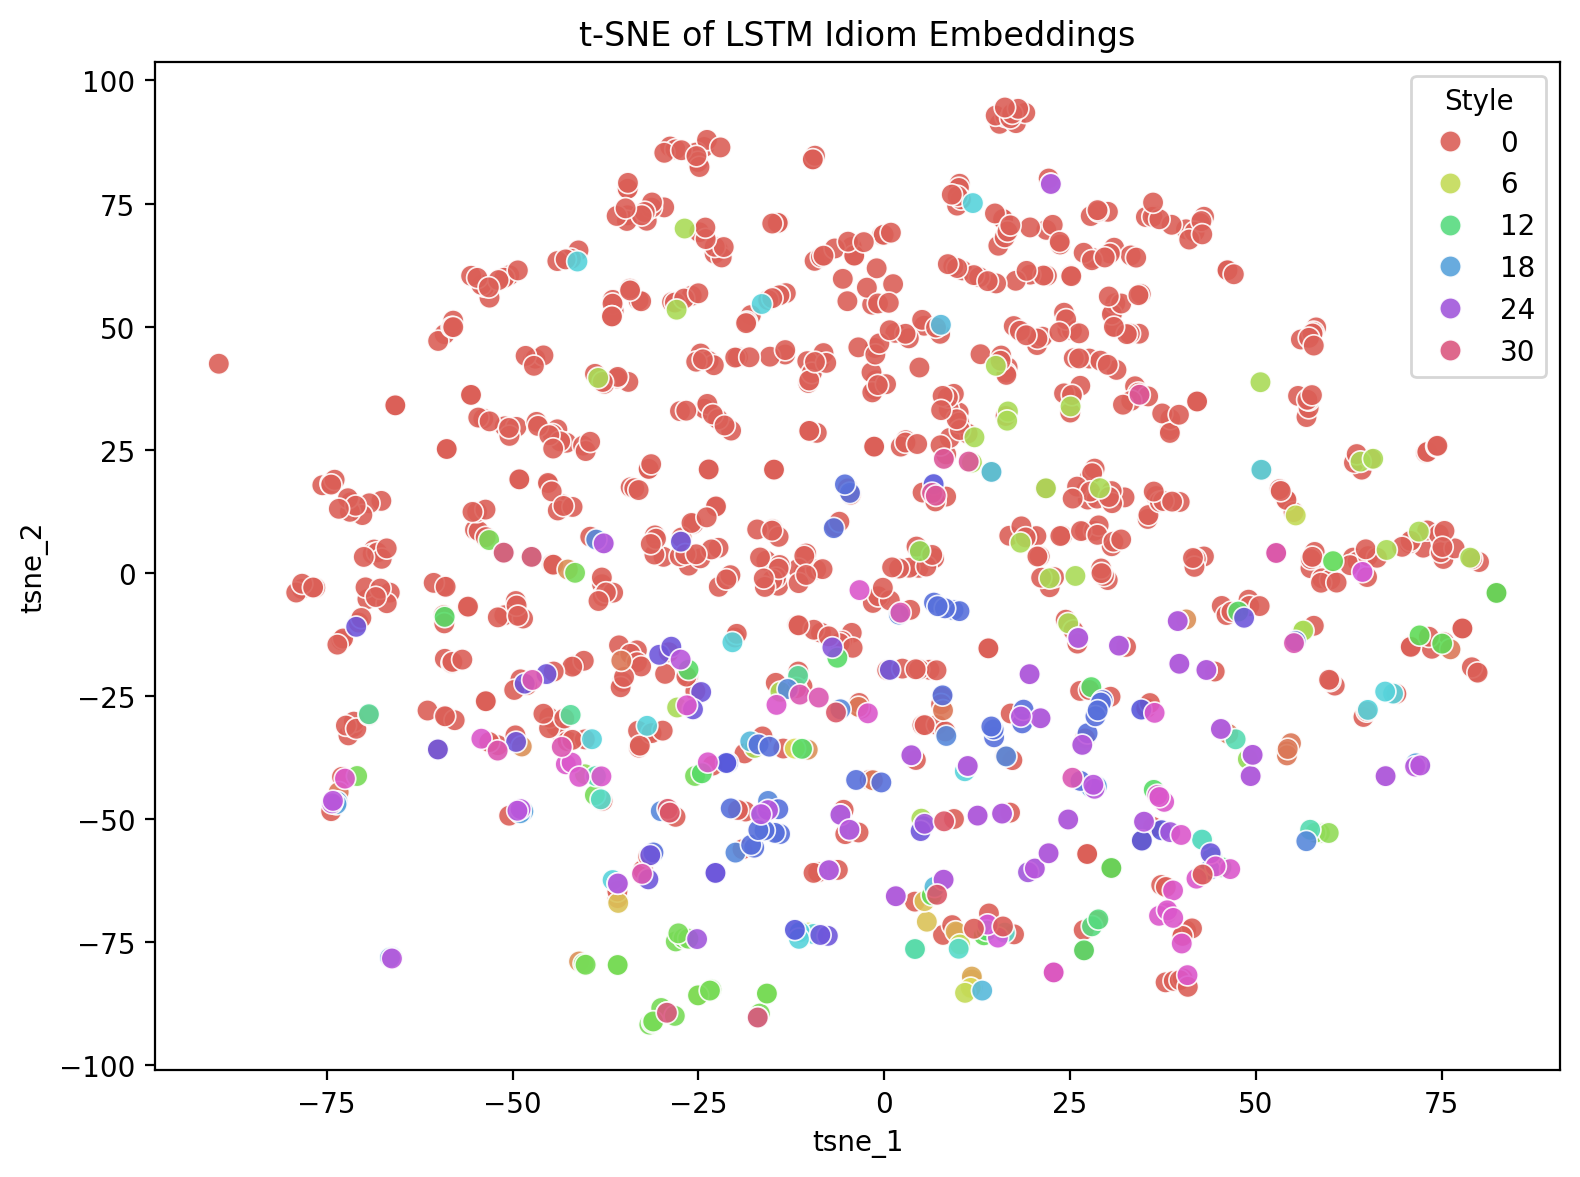

In [18]:
pu.plot_idioms_2(lstm_tsne, idiom_ids_np, 'LSTM')

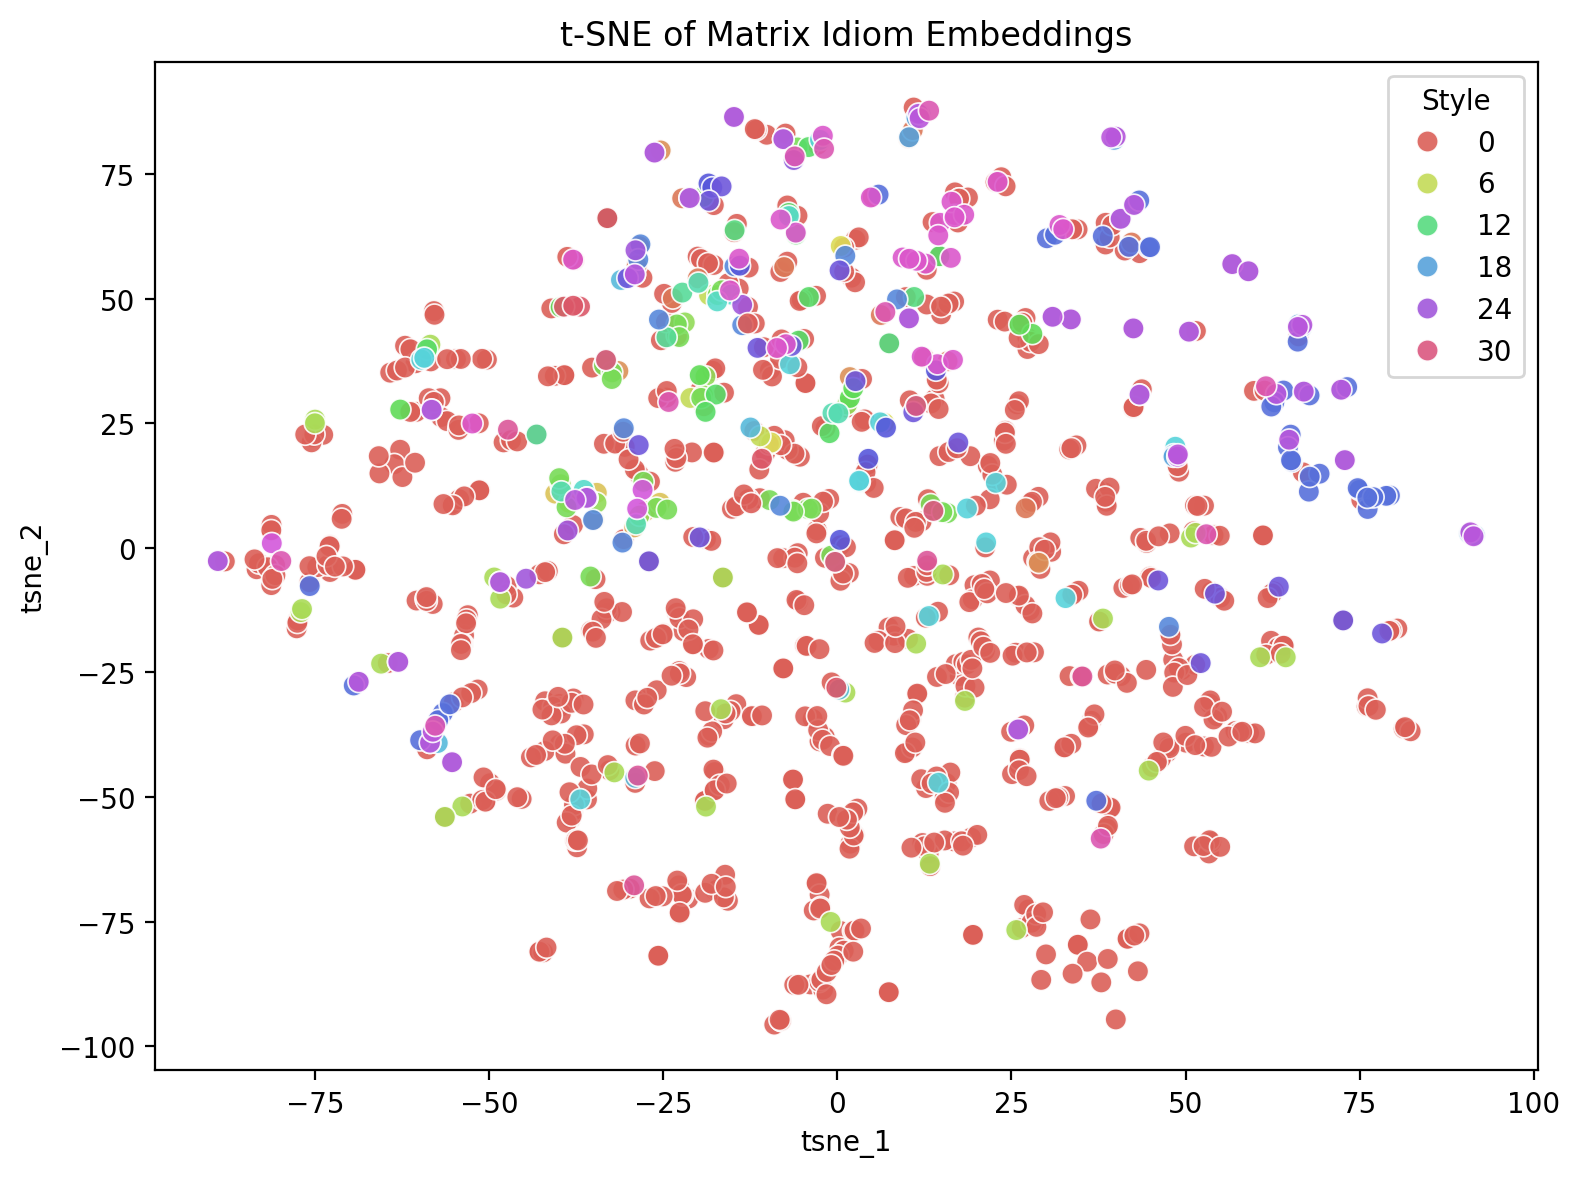

In [19]:
pu.plot_idioms_2(matrix_tsne, idiom_ids_np, 'Matrix')

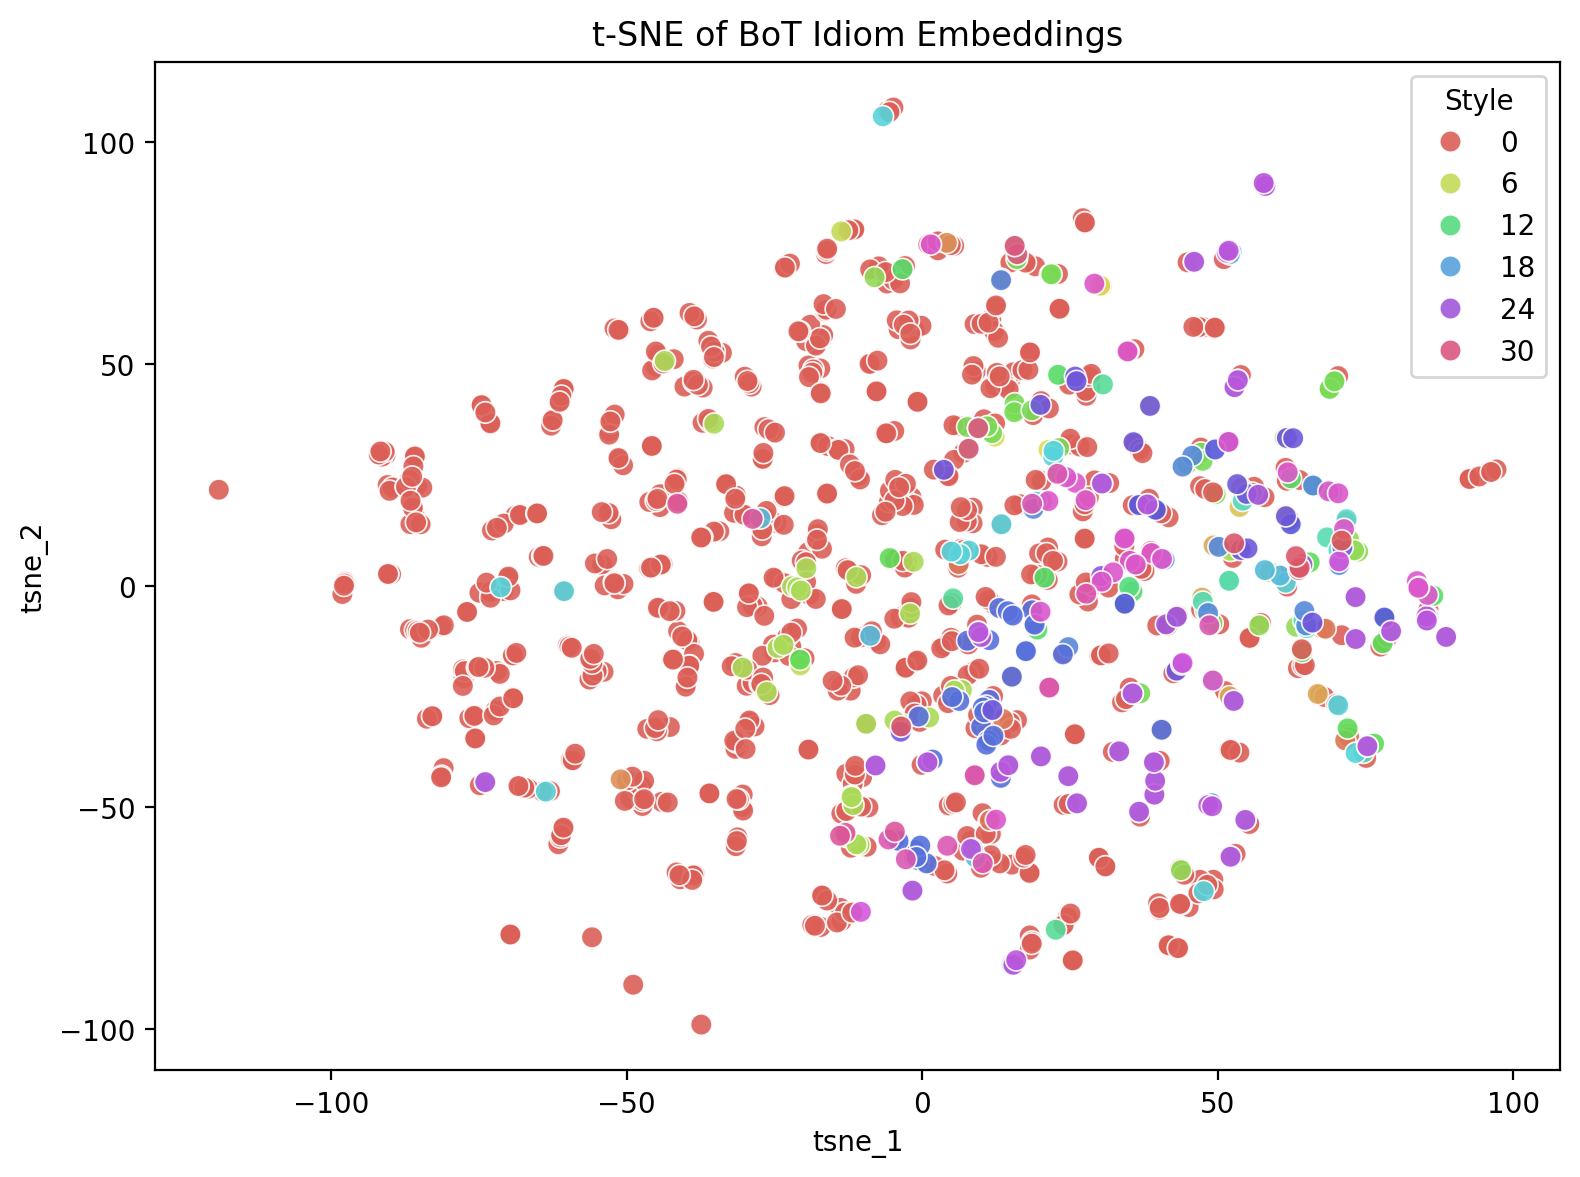

In [20]:
pu.plot_idioms_2(bot_tsne, idiom_ids_np, 'BoT')

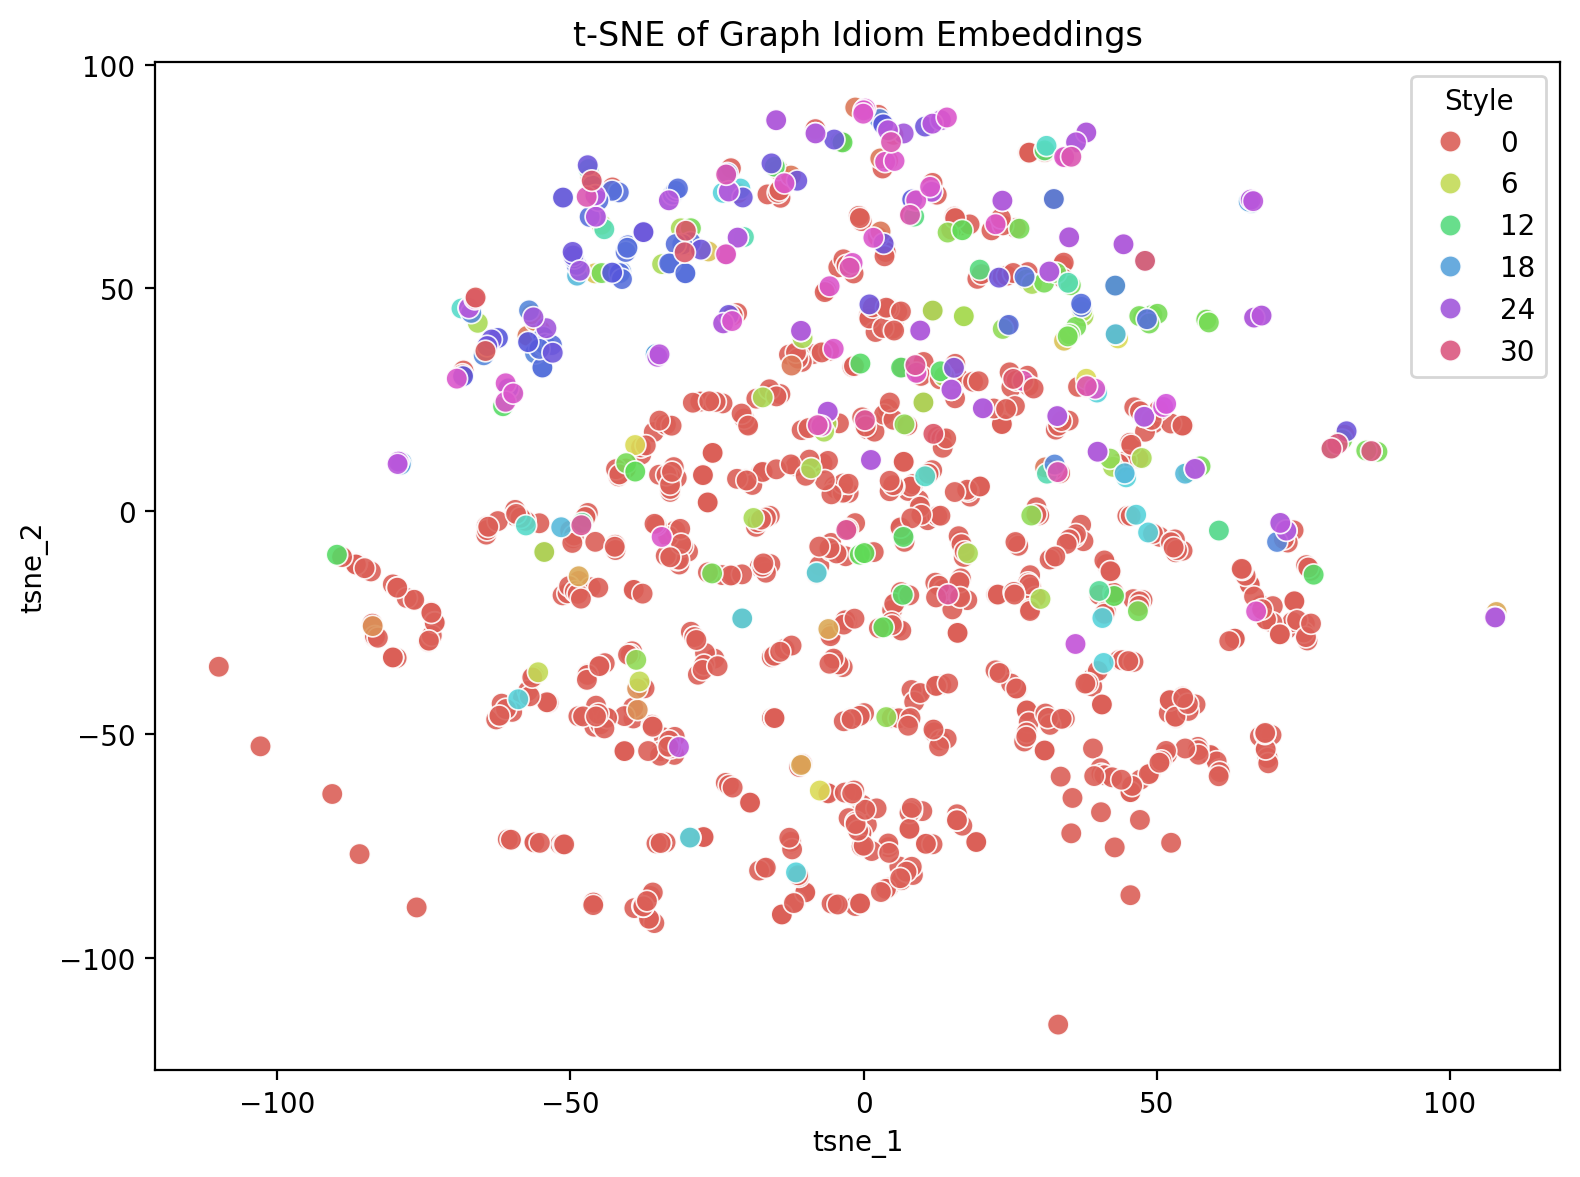

In [21]:
pu.plot_idioms_2(graph_tsne, idiom_ids_np, 'Graph')